In [1]:
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
import pathlib

# Defining the image size
image_height =150
image_width = image_height

# Loading for training_set
data_dir = "../data/"

x_train = tf.keras.utils.image_dataset_from_directory(
    data_dir + "seg_train/seg_train",
    seed=123,
    validation_split=0.2,
    subset="training",
    image_size=(image_width, image_width),
    batch_size=28)

x_val = tf.keras.utils.image_dataset_from_directory(
    data_dir + "seg_train/seg_train",
    seed=1234,
    validation_split=0.2,
    subset="validation",
    image_size=(image_width, image_width),
    batch_size=46)



# Loading for test_set
test_ds = tf.keras.utils.image_dataset_from_directory(
    data_dir + "seg_test/seg_test",
    seed=1234567,
    image_size=(image_width, image_width),
    batch_size=100)



Found 14034 files belonging to 6 classes.
Using 11228 files for training.
Found 14034 files belonging to 6 classes.
Using 2806 files for validation.
Found 3000 files belonging to 6 classes.


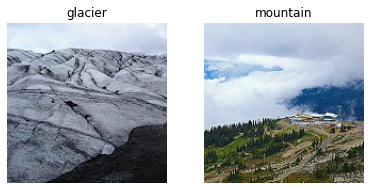

In [2]:
import matplotlib.pyplot as plt

# Showing the images with classnames
class_names = x_train.class_names

plt.figure(figsize=(10, 10))
for images, labels in x_train.take(1):
    for i in range(2):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")


In [3]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import tensorflow.keras.callbacks as cb
# Making hidden layers for model.
#model = keras.models.Sequential()


model = Sequential([
  layers.Rescaling(1./255, input_shape=(image_height, image_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    layers.Dense(64, activation='relu'),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
    layers.Flatten(),
  layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])
#model.add(keras.Input(shape=(image_height, image_width)))

#model.add(keras.layers.Dense(300, activation="relu"))

#model.add(keras.layers.Dense(10, activation="softmax"))

model.summary()

model.input_shape


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling (Rescaling)       (None, 150, 150, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 150, 150, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 75, 75, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 75, 75, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 37, 37, 32)       0         
 2D)                                                             
                                                                 
 dense (Dense)               (None, 37, 37, 64)        2

(None, 150, 150, 3)

In [4]:
# Checking data for the model

print("\n The name of the layers")
for i in range(len(model.layers)):
    print("Name")
    hidden = model.layers[i]
    print(hidden.name)
    if (i == 8):
        print()


 The name of the layers
Name
rescaling
Name
conv2d
Name
max_pooling2d
Name
conv2d_1
Name
max_pooling2d_1
Name
dense
Name
conv2d_2
Name
max_pooling2d_2
Name
flatten

Name
dense_1
Name
dense_2


In [5]:
import numpy as np
import tensorflow_datasets as tfds
import pandas as pd

# Compile the model
model.compile(loss=keras.losses.sparse_categorical_crossentropy,
              optimizer=keras.optimizers.SGD(momentum=0.9),
              metrics=["accuracy"])

early_stopping_cb = cb.EarlyStopping(patience=10, restore_best_weights=True)

history = model.fit(x_train, epochs=50, validation_data=x_val, callbacks=[
    early_stopping_cb
])

Epoch 1/50
401/401 [==============================] - 127s 315ms/step - loss: 1.1518 - accuracy: 0.5419 - val_loss: 0.8073 - val_accuracy: 0.6842

{'verbose': 1, 'epochs': 50, 'steps': 401}


<AxesSubplot:>

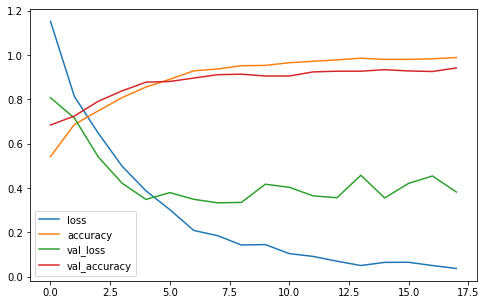

In [6]:
print(history.params)

pd.DataFrame(history.history).plot(figsize=(8,5))

In [7]:
from tensorflow.python.client import device_lib

results = model.evaluate(test_ds)
print(results)

print(device_lib.list_local_devices())


30/30 [==============================] - 17s 578ms/step - loss: 1.2536 - accuracy: 0.7243